<h1 style="font-family:verdana;" > <center>📚 Reviews Sentimental Analysis  📚</center> </h1>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode (connected = True)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Data</center>
</h1>
</div>

In [ ]:
data=pd.read_csv('reviews (1).csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Having A Look At The Data</center>
</h1>
</div>

In [ ]:
data.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Preprocessing The Data</center>
</h1>
</div>

In [ ]:
# Proprocessing the data
data['Review']=data['Review'].str.lower()
# Code to remove the Hashtags from the text
data['Review']=data['Review'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['Review']=data['Review'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['Review']=data['Review'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['Review']=data['Review'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['Review']=data['Review'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['Review']=data['Review'].apply(lambda x:re.sub('@[^\s]+','',x))



In [ ]:
data=data[['Review']]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Vader Sentiment Analysis</center>
</h1>
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Vader ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ How does vader work ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative it is .
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is polarity in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Compound Score in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
</div>

In [ ]:

# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['Review'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [ ]:
# Having a look at the vader datafram
vader.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,2,992,2008,gayg msft,5,better than any you can get atrestaurant,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z,0.000,0.326,0.674,0.4404,Positive
1,7,4384,1634,Bill Hilbrich,4,i cut back on the mayo and made up the differe...,2001-10-17T16:49:59Z,2001-10-17T16:49:59Z,0.100,0.000,0.900,-0.2732,Negative
2,9,4523,2046,Gay Gilmore ckpt,2,i thinkdid something wrong becausecould taste ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z,0.237,0.000,0.763,-0.4767,Negative
3,13,7435,1773,Malarkey Test,5,easily the besthave ever had juicy flavorful n...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z,0.000,0.209,0.791,0.5423,Positive
4,14,44,2085,Tony Small,5,an excellent dish,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z,0.000,0.649,0.351,0.5719,Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



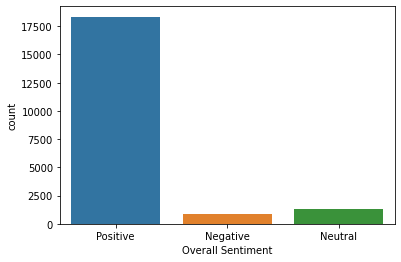

In [ ]:
sns.countplot(vader['Overall Sentiment'])